In [4]:
import pandas as pd

In [52]:
public_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

df = pd.read_csv(public_url, sep=",")

In [53]:
# Group by country, aggregate by sum, transpose
df = df.drop(columns=["Province/State", "Lat", "Long"]).groupby("Country/Region").agg("sum").T
df.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
11/13/20,42969,26701,65975,5725,13228,133,1296378,114383,27682,191228,...,3883,69754,1,96441,1256,61514,10,2072,17093,8765
11/14/20,43035,27233,66819,5725,13374,134,1304846,115855,27711,198291,...,3957,69987,1,96933,1265,62167,10,2072,17097,8786
11/15/20,43240,27830,67679,5872,13451,134,1310491,117337,27749,203956,...,4030,70243,1,97352,1281,63031,10,2072,17123,8829
11/16/20,43403,28432,68589,5914,13615,134,1318384,117886,27758,208613,...,4104,70381,1,97739,1283,63867,10,2078,17187,8897
11/17/20,43628,29126,69591,5951,13818,134,1329005,118870,27777,214597,...,4208,70648,1,98050,1288,64935,10,2081,17243,8945


In [63]:
# Set dataframe index to Datetime
df_datetime = pd.to_datetime(df.index)
datetime_index = pd.DatetimeIndex(df_datetime.values)
df = df.set_index(datetime_index)
df[(df.index.month >= 4) & (df.index.year == 2020)] 

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-04-01,237,259,847,390,8,7,1054,571,4862,10711,...,350,181,0,143,218,134,0,0,36,8
2020-04-02,273,277,986,428,8,9,1133,663,5116,11129,...,369,205,0,146,233,161,0,0,39,9
2020-04-03,281,304,1171,439,8,15,1265,736,5330,11524,...,386,227,0,153,237,194,0,0,39,9
2020-04-04,299,333,1251,466,10,15,1451,770,5550,11781,...,400,266,0,155,240,217,0,0,39,9
2020-04-05,349,361,1320,501,14,15,1451,822,5687,12051,...,406,342,0,159,241,237,4,0,39,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-13,42969,26701,65975,5725,13228,133,1296378,114383,27682,191228,...,3883,69754,1,96441,1256,61514,10,2072,17093,8765
2020-11-14,43035,27233,66819,5725,13374,134,1304846,115855,27711,198291,...,3957,69987,1,96933,1265,62167,10,2072,17097,8786
2020-11-15,43240,27830,67679,5872,13451,134,1310491,117337,27749,203956,...,4030,70243,1,97352,1281,63031,10,2072,17123,8829
2020-11-16,43403,28432,68589,5914,13615,134,1318384,117886,27758,208613,...,4104,70381,1,97739,1283,63867,10,2078,17187,8897


In [77]:
# Sort by confirmed cases on latest date (index.value[-1])
sorted = df.sort_values(by=df.index.values[-1], axis=1,ascending=False)

# select the first 7 countries with most cases
cases = sorted.iloc[:, 0:8]
cases

Country/Region,US,India,Brazil,France,Russia,Spain,United Kingdom,Argentina
2020-01-22,1,0,0,0,0,0,0,0
2020-01-23,1,0,0,0,0,0,0,0
2020-01-24,2,0,0,2,0,0,0,0
2020-01-25,2,0,0,3,0,0,0,0
2020-01-26,5,0,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...
2020-11-13,10737335,8773479,5810652,1972149,1865395,1458591,1321031,1296378
2020-11-14,10903890,8814579,5848959,2004244,1887836,1458591,1347907,1304846
2020-11-15,11036935,8845127,5863093,2031472,1910149,1458591,1372884,1310491
2020-11-16,11195388,8873541,5876464,2041293,1932711,1496864,1394299,1318384


### Resampling Time-Series Dataframe
Resampling is necessary when you are given a dataset recorded in some time interval and you want to change the time interval to something else. **`resample()`** is a time-based groupby, followed by a reduction method on each of its groups. **`resample()`** is similar to using a **`rolling()`** operation with a time-based offset.
```
df.resample(<offset frequency>).<aggregation-operation>
```
Two kinds of resampling:
1. **Downsampling** &mdash; Resample to wider time frame. Can use all the groupby aggregate functions including `mean()`, `min()`, `max()`, `sum()`. Total number of rows goes down.)
2. **Unsampling** &mdash; Resample to a shorter time frame. Result in additional empty rows.

Text(0.5, 1.0, 'Mean-Resampled COVID-19 Confirmed Cases in Weekly Interval')

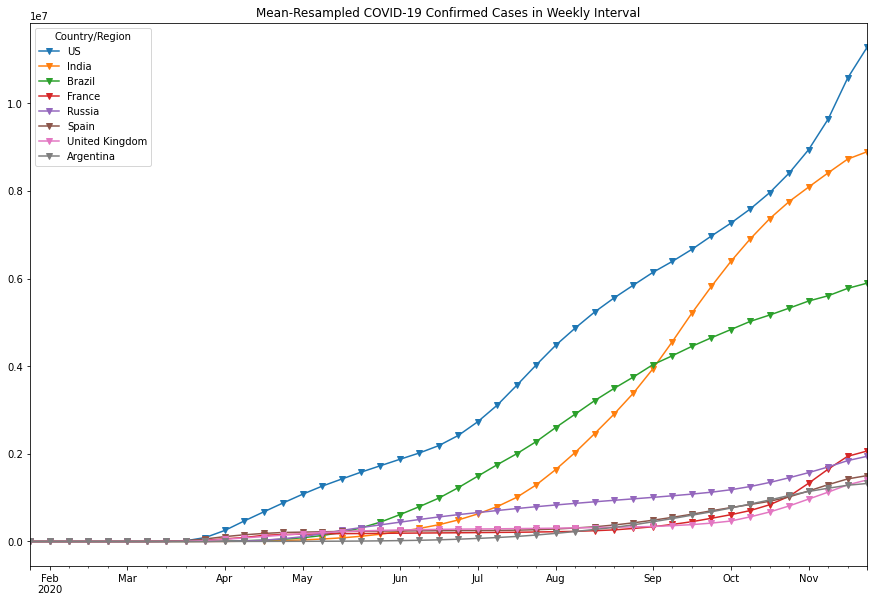

In [82]:
# Resample the dataframe
plot = cases.resample("W").mean().plot(marker="v", figsize=(15, 10))
plot.set_title("Mean-Resampled COVID-19 Confirmed Cases in Weekly Interval")

<AxesSubplot:>

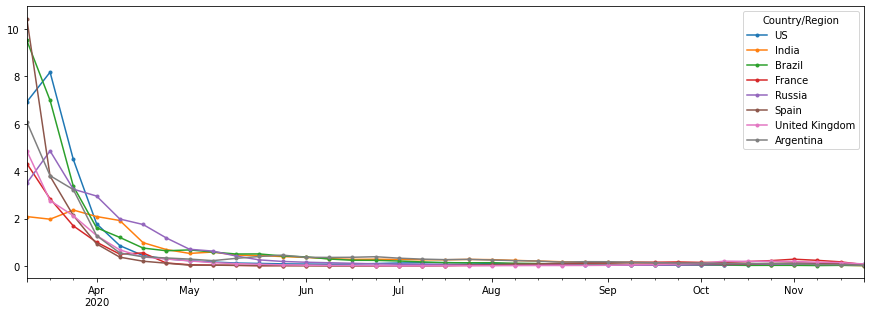

In [85]:
plot_growth = cases.resample("W").mean().pct_change()
plot_growth.iloc[7:].plot(marker=".", figsize=(15, 5))